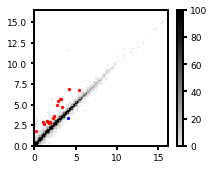

In [51]:
tbl_sig = open('15Month_vs_6Month_selected.fastq.trimmed.RAT_ens98_longest_cDNA.BWA.SAMBestCount.glmQLFit.RobustDisp.edgeR_clean.txt','r')
tbl = open('Rat_Brain_15M_6M_6W_rpkm_GeneName.txt','r')

Iron_up = []
Iron_down = []
Iron_up_x = []
Iron_up_y = []
Iron_down_x = []
Iron_down_y = []
tbl_sig.readline()
for line in tbl_sig:
    tokens = line.strip().split('\t')
    GeneName = tokens[0]
    logFC = float(tokens[1])
    if logFC > 1:
        Iron_up.append(GeneName)
    else:
        Iron_down.append(GeneName)
tbl_sig.close()

import math
Iron_unsig_x = []
Iron_unsig_y = []
tbl.readline()
for line in tbl:
    tokens = line.strip().split('\t')
    GeneName = tokens[0]
    RPKM_x = [float(x) for x in tokens[9:17]]
    RPKM_x_val = math.log(sum(RPKM_x,0.0)/len(RPKM_x)+1,2)
    RPKM_y = [float(x) for x in tokens[1:9]] 
    RPKM_y_val = math.log(sum(RPKM_y,0.0)/len(RPKM_y)+1,2)
    if GeneName in Iron_up:
        Iron_up_x.append(RPKM_x_val)
        Iron_up_y.append(RPKM_y_val)
    elif GeneName in Iron_down:
        Iron_down_x.append(RPKM_x_val)
        Iron_down_y.append(RPKM_y_val)
    else:
        Iron_unsig_x.append(RPKM_x_val)
        Iron_unsig_y.append(RPKM_y_val)
tbl.close()

from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

black2grey = LinearSegmentedColormap.from_list('black2grey', [
    (0, '#ffffff'),
    (1e-20, '#e5e5e5'),
    (0.2, '#b2b2b2'),
    (0.4, '#7f7f7f'),
    (0.6, '#4c4c4c'),
    (0.8, '#191919'),
    (1, '#000000'),
], N=256)

import numpy as np

x = np.array(Iron_unsig_x)
y = np.array(Iron_unsig_y)
plt.hist2d(x,y,(100,100), vmin = 0, vmax = 100,cmap = black2grey)
CB = plt.colorbar()
CB.ax.tick_params(width = 2)
CB.outline.set_linewidth(2)
plt.scatter(x = Iron_up_x, y = Iron_up_y, c='r', s=5)
plt.scatter(x = Iron_down_x, y = Iron_down_y, c = 'b', s=5)
ax = plt.gca()
ax.tick_params(width = 2)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)
plt.rcParams["figure.figsize"] = (3,2.5)
plt.rcParams['font.size'] = 9
plt.savefig('15Month_vs_6Month_DEG_scatterplot_matplotlib_KDE.pdf')